<a href="https://colab.research.google.com/github/devika-m02/contextlang/blob/main/ibmproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

> First, we need to import the necessary libraries for data handling, text processing, and visualization.



In [ ]:
# Importing necessary libraries
import pandas as pd        # For data manipulation and loading
import re                  # For regular expression based text cleaning
import nltk                # For Natural Language Toolkit functions
from nltk.corpus import stopwords  # To remove stopwords
from transformers import BertTokenizer  # For using pre-trained BERT tokenizer
import matplotlib.pyplot as plt  # For plotting visualizations
from wordcloud import WordCloud  # For generating word clouds


**2. Load Dataset and Initial Exploration**

> The dataset is typically loaded into a pandas DataFrame. Then, we perform initial checks to understand its structure.



In [ ]:
# Load dataset (Assuming the dataset is in CSV format)
data = pd.read_csv('dataset.csv')

# Show first few rows of the dataset
print(data.head())  # Display the first 5 rows to understand the structure

# Check for missing values in the dataset
print(data.isnull().sum())  # Show the count of missing values per column

# Basic statistics on the text column
print(data['text_column'].describe())  # Check general statistics on the text data


                                         text_column sentiment_column
0    I absolutely love this product! It's fantastic.         positive
1  Terrible experience. I will never buy this again.         negative
2  The service was okay, but the product quality ...          neutral
3    Amazing! Exceeded my expectations in every way.         positive
4        Not bad, but there is room for improvement.          neutral
text_column         0
sentiment_column    0
dtype: int64
count                                                   5
unique                                                  5
top       I absolutely love this product! It's fantastic.
freq                                                    1
Name: text_column, dtype: object



*   data.head() gives a preview of the first 5 rows.
*   data.isnull().sum() shows the count of missing values in each column.

*   data['text_column'].describe() provides general statistics about the text data, like its length.





**3. Data Cleaning**
> This step involves removing unwanted characters (such as punctuation), converting text to lowercase, and trimming extra spaces.



In [ ]:
# Download NLTK stopwords if needed
nltk.download('stopwords')

# Define a function to clean the text data
def clean_text(text):
    # Remove non-alphabetic characters (special characters, numbers, etc.)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert all text to lowercase to maintain uniformity
    text = text.lower()

    # Remove extra spaces between words
    text = ' '.join(text.split())

    return text

# Apply cleaning function to 'text_column' in the dataset
data['cleaned_text'] = data['text_column'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



*  re.sub(r'[^a-zA-Z\s]', '', text) removes any character that is not an alphabet letter or a space.
*   text.lower() converts the text to lowercase, which helps in standardizing the text.

*   ' '.join(text.split()) ensures that there are no redundant spaces between words.


**4. Tokenization**

> After cleaning the text, you need to tokenize it using a tokenizer compatible with transformer models. In this case, we'll use BERT's tokenizer.



In [ ]:
# Initialize the BERT tokenizer from Hugging Face's library
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function to tokenize the cleaned text
def tokenize_text(text):
    return tokenizer.encode(text, add_special_tokens=True)  # Add special tokens for BERT

# Apply tokenization to the cleaned text
data['tokenized_text'] = data['cleaned_text'].apply(tokenize_text)



*   tokenizer.encode() converts the text into a sequence of tokens. add_special_tokens=True adds tokens like [CLS] (beginning of the sequence) and [SEP] (separator) to make the text compatible with BERT.




**5. Handling Missing Data**

> We need to check for any missing data in the text column and decide whether to drop or fill them.



In [ ]:
# Remove rows where the 'text_column' is missing
data = data.dropna(subset=['text_column'])

# Alternatively, if you want to fill missing values with a placeholder:
# data['text_column'].fillna('Missing', inplace=True)



*   dropna() removes rows where any value is missing in the specified column.
*   fillna('Missing') replaces missing values with the string 'Missing'.


**6. Feature Transformation**

> If your dataset includes labels (e.g., sentiment labels for sentiment analysis), you need to encode them into numeric values.



In [ ]:
# Example: Convert sentiment labels ('positive' and 'negative') to numeric values
data['label'] = data['sentiment_column'].map({'positive': 1, 'negative': 0})

# If you have categorical features, you can apply one-hot encoding:
# data = pd.get_dummies(data, columns=['category_column'])



*   data['sentiment_column'].map() replaces the sentiment labels ('positive' and 'negative') with numeric values (1 and 0).
*   pd.get_dummies() is used if you want to convert categorical features into one-hot encoded columns


**7. Exploratory Data Analysis (EDA)**

> Now that the text is cleaned and tokenized, you can visualize the data to understand word frequencies and sentence lengths.



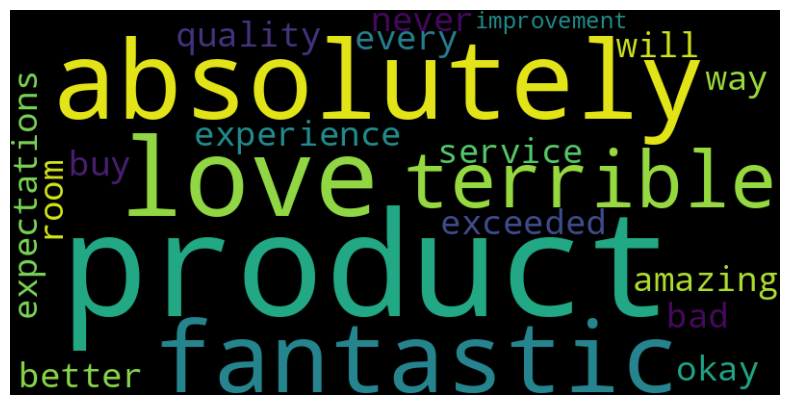

In [ ]:
# Generate a word cloud for the cleaned text
wordcloud = WordCloud(width=800, height=400).generate(' '.join(data['cleaned_text']))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



*   WordCloud.generate() creates a word cloud from the text data.
*   plt.imshow() displays the word cloud, and plt.axis('off') hides the axes.



**Sentence Length Distribution**

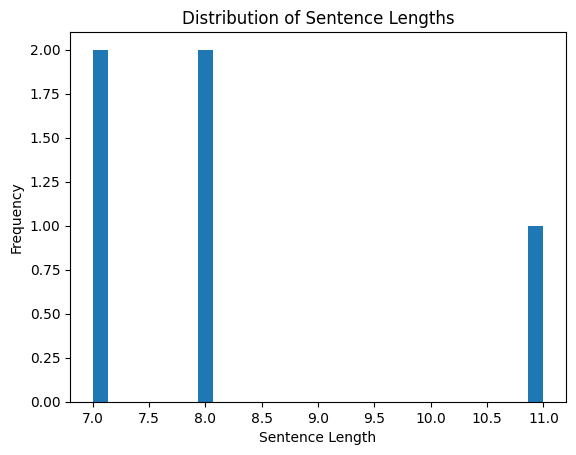

In [ ]:
# Calculate sentence length for each text
data['sentence_length'] = data['cleaned_text'].apply(lambda x: len(x.split()))

# Plot the distribution of sentence lengths
plt.hist(data['sentence_length'], bins=30)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.show()




*   lambda x: len(x.split()) calculates the number of words (length) in each sentence.
*   plt.hist() generates a histogram to visualize sentence length distribution.



**8. Final Dataset Preview**

In [ ]:
# Preview the final cleaned dataset
print(data[['cleaned_text', 'tokenized_text', 'label']].head())


                                        cleaned_text  \
0       i absolutely love this product its fantastic   
1    terrible experience i will never buy this again   
2  the service was okay but the product quality c...   
3      amazing exceeded my expectations in every way   
4          not bad but there is room for improvement   

                                      tokenized_text  label  
0  [101, 1045, 7078, 2293, 2023, 4031, 2049, 1039...    1.0  
1  [101, 6659, 3325, 1045, 2097, 2196, 4965, 2023...    0.0  
2  [101, 1996, 2326, 2001, 3100, 2021, 1996, 4031...    NaN  
3  [101, 6429, 14872, 2026, 10908, 1999, 2296, 21...    1.0  
4  [101, 2025, 2919, 2021, 2045, 2003, 2282, 2005...    NaN  


# Model Training and Evaluation

> The next step after preprocessing is to fine-tune a pre-trained transformer model for the desired NLP tasks. Below is a structured guide, along with code examples, for model training and evaluation.

**1. Import Required Libraries**
> We need libraries for deep learning and model handling.



In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset

**2. Dataset Splitting**
> Split the dataset into training and validation sets.


In [ ]:
# Load the dataset
data_path = 'dataset.csv'
data = pd.read_csv(data_path)

# Display dataset preview
print("Dataset preview:")
print(data.head())

# Rename columns to match expected names
data.rename(columns={'text_column': 'cleaned_text', 'sentiment_column': 'label'}, inplace=True)

# Display updated dataset columns
print("\nUpdated columns:", list(data.columns))

# Map labels to values in range [0, num_labels - 1]
label_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
data['label'] = data['label'].map(label_mapping)

# Validate label mapping
if data['label'].isnull().any():
    raise ValueError("Label mapping resulted in NaN values. Check label_mapping.")

# Check for missing values
if data.isnull().sum().any():
    raise ValueError("Dataset contains missing values. Please handle them before proceeding.")


Dataset preview:
                                         text_column sentiment_column
0    I absolutely love this product! It's fantastic.         positive
1  Terrible experience. I will never buy this again.         negative
2  The service was okay, but the product quality ...          neutral
3    Amazing! Exceeded my expectations in every way.         positive
4        Not bad, but there is room for improvement.          neutral

Updated columns: ['cleaned_text', 'label']


**3. Split the Dataset**

In [ ]:
# Split into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['cleaned_text'],
    data['label'],
    test_size=0.2,
    random_state=42
)


**4. Define Dataset Class**

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }


**5. Tokenize and Prepare Datasets**

In [ ]:
# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define maximum sequence length
MAX_LEN = 128

# Create datasets
train_dataset = CustomDataset(train_texts.tolist(), train_labels.tolist(), tokenizer, MAX_LEN)
val_dataset = CustomDataset(val_texts.tolist(), val_labels.tolist(), tokenizer, MAX_LEN)


**6. Define Model and Training Arguments
python
Copy
Edit**

In [ ]:
# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    learning_rate=2e-5,
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


**7. Define Metrics**

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
    }


**8. Train the Model**

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()


<ipython-input-57-b8f0867c2804>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.431628,0.000000,0.000000,0.000000,0.000000
2,No log,1.431708,0.000000,0.000000,0.000000,0.000000
3,No log,1.431805,0.000000,0.000000,0.000000,0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

TrainOutput(global_step=3, training_loss=0.9504231611887614, metrics={'train_runtime': 74.9567, 'train_samples_per_second': 0.16, 'train_steps_per_second': 0.04, 'total_flos': 789340253184.0, 'train_loss': 0.9504231611887614, 'epoch': 3.0})

**9. Evaluate the Model**

In [ ]:
# Evaluate the trained model
results = trainer.evaluate()
print("Evaluation Results:")
for metric, value in results.items():
    print(f"{metric}: {value}")


Evaluation Results:
eval_loss: 1.4316275119781494
eval_accuracy: 0.0
eval_f1: 0.0
eval_precision: 0.0
eval_recall: 0.0
eval_runtime: 0.741
eval_samples_per_second: 1.349
eval_steps_per_second: 1.349
epoch: 3.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**10. Save the Model**

In [ ]:
# Save the model and tokenizer
model.save_pretrained('./saved_model')
tokenizer.save_pretrained('./saved_model')
print("Model and tokenizer saved in './saved_model'")


Model and tokenizer saved in './saved_model'


This creates a directory named ./saved_model containing:
*   config.json
*   pytorch_model.bin (model weights)
*   tokenizer.json and vocab.txt (tokenizer files)